In [2]:
import csv
from itertools import count
import operator
import math

EPSILON = 0.000001


def calc_term_doc_given_author(prob_map, counts):
    """
    How likely is the document, given the counts of words in the doc
    and the authors prob_map
    """
    prob = 1
    return prob


# If a word is in a probability dictionary, return its probability
# otherwise, return epsilon
def get_word_prob(word_prob_map, word):
    """
    Gets probability of a word:
    Returns probability if word exists, EPSILON if not
    """
    if word in word_prob_map:
        return word_prob_map[word]
    #return EPSILON

# From a file name, approximate the probability of a word
# being generated from the same distribution as the file.
# Assume that each word is produced independently, regardless
# of order.
def make_word_prob_map(fileName):
    """
    Calculates word probabilities:
    1. Counts word frequencies
    2. Converts counts to probabilities
    Returns: word probability dictionary
    """
    wordMap, nWords = make_word_count_map(fileName)
    # print(fileName)
    # print("----------------------------")
    # print(wordMap)
    # print("----------------------------")
    # print(nWords)
    # print("----------------------------")
    probabilityMap = {}
    for word in wordMap:
        count = wordMap[word]
        p = float(count) / nWords
        probabilityMap[word] = p
    return probabilityMap

# From a file name, count the number of times each word exists
# in that file. Return the result as a map (aka a dictionary)
def make_word_count_map(fileName):
    """
    Reads a file and counts word frequencies:
    1. Opens file
    2. Splits into words
    3. Standardizes each word
    4. Counts occurrences
    Returns: (wordMap, total word count)
    """
    wordMap = {}
    nWords = 0
    with open(fileName ,encoding="utf-8") as f:
        for line in f:
            words = line.split(' ')
            for word in words:
                word = standardize(word)
                add_word_to_count_map(wordMap, word)
                nWords+= 1
    return wordMap, nWords

# Add a word to a count map. Makes sure not to crash if the
# word has not been seen before.
def add_word_to_count_map(wordMap, word):
    """
    Updates word count in dictionary:
    1. Skips stop words
    2. Initializes count if new word
    3. Increments count if existing word
    """
    if is_stop(word):
        return
    if not word in wordMap:
        wordMap[word] = 0
    wordMap[word] += 1


def standardize(word):
    """
    Standardizes words by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Keeping only alphabetic characters
    """
    standard = word.lower().strip()
    # remove punctuation
    standard = ''.join([i for i in standard if i.isalpha()])
    return standard

def is_stop(word):
    """
    Removes common words that don't help in analysis
    """
    stop_words = ['to', 'i', 'the', 'and', 'of']
    return word in stop_words


def main():
    # Calculate all the ps and qs
    # Eg hamiltonWordProb['congress'] = 0.005
    # hamilton_word_prob['piech'] = 0.0
    # hamilton_word_prob['the'] = 0.001

    hamilton_word_prob = make_word_prob_map('hamilton.txt')
    madison_word_prob = make_word_prob_map('madison.txt')

    # print("********************************************")
    # print("hamilton_word_prob", hamilton_word_prob)
    # print("----------------------------------------------")
    # print("madison_word_prob", madison_word_prob)
    # print("--------------------------------------")
    # print("********************************************")

    # print(hamilton_word_prob["independent"])
    # print(madison_word_prob["independent"])

    unknown_doc_count, n_words = make_word_count_map('unknowntwo.txt')

    print("*" * 50)
    print(unknown_doc_count)
    print("*" * 50)
    print(n_words)


if __name__ == '__main__':
    main()

**************************************************
{'utility': 6, 'union': 31, 'in': 514, 'respect': 21, 'commercial': 13, 'relations': 1, 'a': 556, 'navy': 10, 'hamilton': 6, 'for': 206, 'independent': 9, 'journal': 3, '': 315, 'people': 54, 'state': 61, 'new': 30, 'york': 9, 'importance': 12, 'light': 2, 'is': 263, 'one': 54, 'those': 51, 'points': 5, 'about': 4, 'which': 199, 'there': 64, 'least': 14, 'room': 4, 'entertain': 1, 'difference': 7, 'opinion': 13, 'has': 107, 'fact': 8, 'commanded': 1, 'most': 44, 'general': 35, 'assent': 1, 'men': 33, 'who': 35, 'have': 179, 'any': 50, 'acquaintance': 1, 'with': 174, 'subject': 15, 'this': 174, 'applies': 1, 'as': 205, 'well': 25, 'our': 111, 'intercourse': 7, 'foreign': 22, 'countries': 6, 'each': 33, 'other': 72, 'are': 148, 'appearances': 1, 'authorize': 1, 'supposition': 1, 'that': 305, 'adventurous': 1, 'spirit': 17, 'distinguishes': 1, 'character': 9, 'america': 15, 'already': 7, 'excited': 3, 'uneasy': 1, 'sensations': 1, 'severa

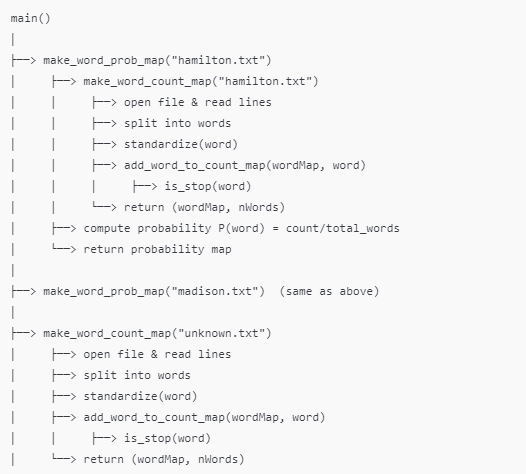

In [3]:
import csv
from itertools import count
import operator
import math

EPSILON = 0.000001


def calc_term_doc_given_author(prob_map, counts):
    """
    How likely is the document, given the counts of words in the doc
    and the authors prob_map
    """
    prob = 1
    for word, c_i in counts.items():
        p_word = get_word_prob(prob_map, word)
        prob *= p_word ** c_i
        print(word, c_i, prob)
    return prob
    # prob = 0
    # for word, c_i in counts.items():
    #     p_word = get_word_prob(prob_map, word)
    #     prob += math.log(p_word) * c_i
    # return prob


# If a word is in a probability dictionary, return its probability
# otherwise, return epsilon
def get_word_prob(word_prob_map, word):
    """
    Gets probability of a word:
    Returns probability if word exists, EPSILON if not
    """
    if word in word_prob_map:
        return word_prob_map[word]
    return EPSILON

# From a file name, approximate the probability of a word
# being generated from the same distribution as the file.
# Assume that each word is produced independently, regardless
# of order.
def make_word_prob_map(fileName):
    """
    Calculates word probabilities:
    1. Counts word frequencies
    2. Converts counts to probabilities
    Returns: word probability dictionary
    """
    wordMap, nWords = make_word_count_map(fileName)
    # print(fileName)
    # print("----------------------------")
    # print(wordMap)
    # print("----------------------------")
    # print(nWords)
    # print("----------------------------")
    probabilityMap = {}
    for word in wordMap:
        count = wordMap[word]
        p = float(count) / nWords
        probabilityMap[word] = p
    return probabilityMap

# From a file name, count the number of times each word exists
# in that file. Return the result as a map (aka a dictionary)
def make_word_count_map(fileName):
    """
    Reads a file and counts word frequencies:
    1. Opens file
    2. Splits into words
    3. Standardizes each word
    4. Counts occurrences
    Returns: (wordMap, total word count)
    """
    wordMap = {}
    nWords = 0
    with open(fileName ,encoding="utf-8") as f:
        for line in f:
            words = line.split(' ')
            for word in words:
                word = standardize(word)
                add_word_to_count_map(wordMap, word)
                nWords+= 1
    return wordMap, nWords

# Add a word to a count map. Makes sure not to crash if the
# word has not been seen before.
def add_word_to_count_map(wordMap, word):
    """
    Updates word count in dictionary:
    1. Skips stop words
    2. Initializes count if new word
    3. Increments count if existing word
    """
    if is_stop(word):
        return
    if not word in wordMap:
        wordMap[word] = 0
    wordMap[word] += 1


def standardize(word):
    """
    Standardizes words by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Keeping only alphabetic characters
    """
    standard = word.lower().strip()
    # remove punctuation
    standard = ''.join([i for i in standard if i.isalpha()])
    return standard

def is_stop(word):
    """
    Removes common words that don't help in analysis
    """
    stop_words = ['to', 'i', 'the', 'and', 'of']
    return word in stop_words


def main():
    # Calculate all the ps and qs
    # Eg hamiltonWordProb['congress'] = 0.005
    # hamilton_word_prob['piech'] = 0.0
    # hamilton_word_prob['the'] = 0.001

    hamilton_word_prob = make_word_prob_map('hamilton.txt')
    madison_word_prob = make_word_prob_map('madison.txt')

    

    # Get the word count of the unknown document
    # Eg unknown_doc_count['congress'] = 5
    unknown_doc_count, n_words = make_word_count_map('unknowntwo.txt')

    print("hamilton['congress']\t", hamilton_word_prob['congress'])
    print("madison['congress']\t",  madison_word_prob['congress'])
    print("doc_count['congress']\t", unknown_doc_count['congress'])
    print("n_words", n_words)

    hamilton_term = calc_term_doc_given_author(hamilton_word_prob, unknown_doc_count)
    print('---'*10)
    madison_term = calc_term_doc_given_author(madison_word_prob, unknown_doc_count)
    print("Hamilton Term\t", hamilton_term)
    print("Madison Term\t",madison_term)

if __name__ == '__main__':
    main()

hamilton['congress']	 0.0011592117360195067
madison['congress']	 0.00016016229779509903
doc_count['congress']	 29
n_words 25017
utility 6 1.9032512818442165e-22
union 31 1.4669541989822442e-112
in 514 0.0
respect 21 0.0
commercial 13 0.0
relations 1 0.0
a 556 0.0
navy 10 0.0
hamilton 6 0.0
for 206 0.0
independent 9 0.0
journal 3 0.0
 315 0.0
people 54 0.0
state 61 0.0
new 30 0.0
york 9 0.0
importance 12 0.0
light 2 0.0
is 263 0.0
one 54 0.0
those 51 0.0
points 5 0.0
about 4 0.0
which 199 0.0
there 64 0.0
least 14 0.0
room 4 0.0
entertain 1 0.0
difference 7 0.0
opinion 13 0.0
has 107 0.0
fact 8 0.0
commanded 1 0.0
most 44 0.0
general 35 0.0
assent 1 0.0
men 33 0.0
who 35 0.0
have 179 0.0
any 50 0.0
acquaintance 1 0.0
with 174 0.0
subject 15 0.0
this 174 0.0
applies 1 0.0
as 205 0.0
well 25 0.0
our 111 0.0
intercourse 7 0.0
foreign 22 0.0
countries 6 0.0
each 33 0.0
other 72 0.0
are 148 0.0
appearances 1 0.0
authorize 1 0.0
supposition 1 0.0
that 305 0.0
adventurous 1 0.0
spirit 17 0.0
d